# ML PROJECT - PREDICTING FIFA PLAYERS OVERALL RATINGS WITH LINEAR REGRESSION AND RANDOM FORESTS & DETERMINING THE MOST RELEVANT ATTRIBUTES

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

In [2]:
df0 = pd.read_csv('playersmain.csv') # importing this dataset as we are going to need the Position column for our actual dataset
print(df0.shape)

(18207, 21)


In [3]:
# importing the actual dataset

df2= pd.read_csv('playerschars.csv')
print(df2.shape)
df2.head()

(18207, 38)


,Unnamed: 0,ID,Name,Overall,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,94,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,94,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,92,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,91,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,91,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
# let's add the Position column from the previous dataset and create the position Category column as we might need this later on

df2['Position'] = df0['Position']

def detect_position(Position):
    if Position == 'GK':
        return 'Goalkeeper'
    elif Position == 'CB' or Position == 'LB' or Position == "RB" or Position == "RWB" or Position == "LWB" or Position == "RCB" or Position == "LCB":
        return 'Defender'
    elif Position == 'CM' or Position == 'CAM' or Position == "CDM" or Position == "RM" or Position == "LM" or  Position == "LDM" or Position == "RDM" or Position == "LCM" or Position == "RCM" or Position == "LAM" or Position == "RAM":
        return 'Midfielder'
    elif Position == 'ST' or Position == 'LW' or Position == "RW" or Position == "LF" or Position == "RF" or Position == "CF" or Position == "LS" or Position == "RS":
        return 'Attacker'
    else:
        pass
    
df2['Position Category'] = df2.apply(lambda x: detect_position(x['Position']), axis=1)

print(df2.shape)
df2.head()

(18207, 40)


,Unnamed: 0,ID,Name,Overall,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Position,Position Category
0,0,158023,L. Messi,94,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,RF,Attacker
1,1,20801,Cristiano Ronaldo,94,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,ST,Attacker
2,2,190871,Neymar Jr,92,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,LW,Attacker
3,3,193080,De Gea,91,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,GK,Goalkeeper
4,4,192985,K. De Bruyne,91,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,RCM,Midfielder


In [5]:
# Convert to categorical
df2['Position Category'] = df2['Position Category'].astype('category')
    
# Create dummy columns and add back to the dataframe, also drop the original column
df2 = pd.concat([df2, pd.get_dummies(df2.select_dtypes(include=['category']))], axis=1).drop('Position Category',axis=1)

print(df2.shape)
df2.head()

(18207, 43)


,Unnamed: 0,ID,Name,Overall,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Position,Position Category_Attacker,Position Category_Defender,Position Category_Goalkeeper,Position Category_Midfielder
0,0,158023,L. Messi,94,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,RF,1,0,0,0
1,1,20801,Cristiano Ronaldo,94,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,ST,1,0,0,0
2,2,190871,Neymar Jr,92,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,LW,1,0,0,0
3,3,193080,De Gea,91,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,GK,0,0,1,0
4,4,192985,K. De Bruyne,91,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,RCM,0,0,0,1


In [6]:
df3 = df2.drop(['Unnamed: 0', 'ID', 'Name', 'Release Clause', 'Position'],  axis=1)
print(df3.shape)
df3.head()

(18207, 38)


,Overall,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Position Category_Attacker,Position Category_Defender,Position Category_Goalkeeper,Position Category_Midfielder
0,94,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,1,0,0,0
1,94,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,0,0,0
2,92,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,0,0,0
3,91,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,0,0,1,0
4,91,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,0,0,0,1


In [7]:
df3.describe()

,Overall,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Position Category_Attacker,Position Category_Defender,Position Category_Goalkeeper,Position Category_Midfielder
count,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,66.238699,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,0.187730,0.322184,0.111221,0.375570
std,6.908930,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,0.390507,0.467326,0.314414,0.484283
min,46.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,66.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000
75%,71.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,0.000000,1.000000,0.000000,1.000000
max,94.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df3.dtypes

Overall                           int64
Finishing                       float64
HeadingAccuracy                 float64
ShortPassing                    float64
Volleys                         float64
Dribbling                       float64
Curve                           float64
FKAccuracy                      float64
LongPassing                     float64
BallControl                     float64
Acceleration                    float64
SprintSpeed                     float64
Agility                         float64
Reactions                       float64
Balance                         float64
ShotPower                       float64
Jumping                         float64
Stamina                         float64
Strength                        float64
LongShots                       float64
Aggression                      float64
Interceptions                   float64
Positioning                     float64
Vision                          float64
Penalties                       float64


In [9]:
null_series = df3.isnull().sum()
print(null_series)

Overall                          0
Finishing                       48
HeadingAccuracy                 48
ShortPassing                    48
Volleys                         48
Dribbling                       48
Curve                           48
FKAccuracy                      48
LongPassing                     48
BallControl                     48
Acceleration                    48
SprintSpeed                     48
Agility                         48
Reactions                       48
Balance                         48
ShotPower                       48
Jumping                         48
Stamina                         48
Strength                        48
LongShots                       48
Aggression                      48
Interceptions                   48
Positioning                     48
Vision                          48
Penalties                       48
Composure                       48
Marking                         48
StandingTackle                  48
SlidingTackle       

In [10]:
df3 = df3[pd.notnull(df3['Finishing'])]
df3.shape

(18159, 38)

In [11]:
columns_series = df3.isnull().sum()

We've dropped these 48 rows (these 48 are the same rows that have missing values in the other columns as well).

In [12]:
#building the correlation matrix
#filtering and sorting out to see what are the columns who has the highest correlation with our target column of Overall

corrmat = df3.corr()
sorted_corrs = corrmat['Overall'].abs().sort_values(ascending=False)
print(sorted_corrs)

Overall                         1.000000
Reactions                       0.850045
Composure                       0.727655
ShortPassing                    0.502550
Vision                          0.498894
LongPassing                     0.483909
BallControl                     0.460197
ShotPower                       0.441118
LongShots                       0.420795
Curve                           0.419491
FKAccuracy                      0.396892
Aggression                      0.395470
Volleys                         0.391338
Dribbling                       0.372426
Stamina                         0.365656
Positioning                     0.356493
Strength                        0.349326
Penalties                       0.341429
HeadingAccuracy                 0.340776
Finishing                       0.332515
Interceptions                   0.321326
Marking                         0.286505
Agility                         0.264952
Jumping                         0.264435
StandingTackle  

We can see that Reactions and Composure has the highest correlation with the Overall rating. 

The third highest has a significant gap already. And then after that it just goes down slowly from 0.5 without any significant gap jumps.

Let's see who are those players that have high Reaction and Composure.

In [13]:
df2[['Name', "Overall", 'Reactions', 'Composure']].sort_values('Reactions', ascending=False).head(10)

,Name,Overall,Reactions,Composure
1,Cristiano Ronaldo,94,96.0,95.0
0,L. Messi,94,95.0,96.0
2,Neymar Jr,92,94.0,94.0
14,N. Kanté,89,93.0,85.0
7,L. Suárez,91,92.0,85.0
26,M. Salah,88,91.0,91.0
21,E. Cavani,89,91.0,82.0
66,T. Müller,86,91.0,83.0
16,H. Kane,89,91.0,89.0
4,K. De Bruyne,91,91.0,88.0


It seems these it's a good predictor for our target column. Both of them seem to be good predictors as we can see from the top 10 players.

<AxesSubplot:>

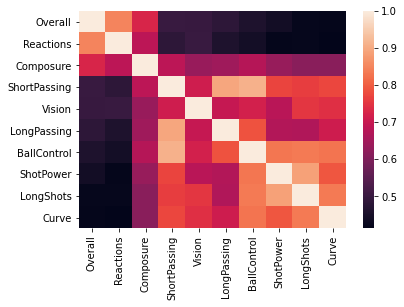

In [14]:
# let's generate the heatmap to check for collinearity
# Collinearity is when 2 feature columns are highly correlated and stand the risk of duplicating information. 
# If we have 2 features that convey the same information using 2 different measures or metrics, we don't need to keep both.

import seaborn as sns
import matplotlib.pyplot as plt
strong_corrs = sorted_corrs[sorted_corrs > 0.4]
corrmat = df3[strong_corrs.index].corr()
sns.heatmap(corrmat)

There is a collinearity between Reactions and Composure. But they do not communicate similar information. So we can include both.

# FITTING THE MODEL

In [15]:
# Let's shuffle the order

df3_shuffled = df3.sample(frac=1).reset_index(drop=True)
df3_shuffled.head()

,Overall,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Position Category_Attacker,Position Category_Defender,Position Category_Goalkeeper,Position Category_Midfielder
0,60,27.0,59.0,53.0,24.0,46.0,35.0,32.0,42.0,52.0,62.0,63.0,59.0,57.0,53.0,41.0,69.0,72.0,64.0,26.0,55.0,59.0,43.0,37.0,36.0,56.0,58.0,60.0,58.0,10.0,12.0,11.0,10.0,8.0,1,0,0,0
1,67,45.0,49.0,70.0,40.0,71.0,62.0,43.0,65.0,68.0,78.0,77.0,79.0,64.0,83.0,53.0,75.0,69.0,64.0,53.0,79.0,57.0,59.0,67.0,40.0,57.0,68.0,62.0,62.0,8.0,12.0,8.0,5.0,7.0,0,0,0,1
2,70,35.0,68.0,63.0,51.0,49.0,41.0,48.0,50.0,59.0,64.0,64.0,63.0,63.0,56.0,55.0,81.0,61.0,75.0,34.0,69.0,69.0,38.0,55.0,53.0,68.0,68.0,72.0,71.0,13.0,15.0,10.0,16.0,16.0,1,0,0,0
3,71,73.0,67.0,58.0,56.0,73.0,36.0,33.0,40.0,71.0,93.0,92.0,88.0,64.0,85.0,63.0,70.0,76.0,65.0,53.0,52.0,28.0,74.0,62.0,66.0,67.0,50.0,28.0,22.0,15.0,10.0,13.0,12.0,12.0,0,0,1,0
4,57,63.0,49.0,54.0,54.0,63.0,49.0,48.0,44.0,61.0,65.0,68.0,50.0,39.0,90.0,73.0,42.0,61.0,33.0,49.0,31.0,20.0,52.0,52.0,67.0,49.0,41.0,28.0,27.0,5.0,10.0,11.0,7.0,6.0,0,0,0,1


In [16]:
# Split into train and test

train = df3_shuffled[0:12000]
test = df3_shuffled[12000:]
print(train.shape)
print(test.shape)

(12000, 38)
(6159, 38)


In [17]:
# Linear Regression with "Composure" as a feature

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

features = ['Composure']
target = 'Overall'

lr = LinearRegression()
lr.fit(train[features], train['Overall'])

# Getting the predictions
train_predictions = lr.predict(train[features])
test_predictions = lr.predict(test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

4.749359347818123
4.730463326633656


In [18]:
# Linear Regression with "Composure" & "Reactions" as features

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

features = ['Composure', 'Reactions']
target = 'Overall'

lr = LinearRegression()
lr.fit(train[features], train['Overall'])

# Getting the predictions
train_predictions = lr.predict(train[features])
test_predictions = lr.predict(test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

3.3786691053276163
3.358799563326654


In [19]:
print(lr.coef_)
print(lr.intercept_)

[0.16340345 0.51084005]
25.062590079954823


We can see that adding Reactions as a feature next to the Composure decrease our both errors significantly.

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). 

Residuals are a measure of how far from the regression line data points are. RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. 

RMSE is in base units and the one we have is quite good for our target column distribution (Overall ranges from 46 to 96).

<AxesSubplot:>

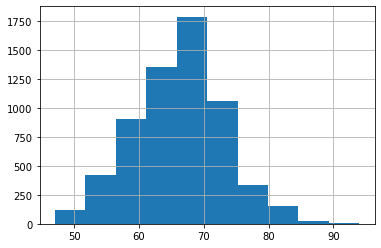

In [20]:
test['Overall'].hist()

Now let's try to add more features in our predictions and see whether it is going to contribute to our model - that is to decrease the RMSE or not.

In [21]:
# Linear Regression with 6 features

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

features = ['Composure', 'Reactions','ShortPassing', 'Vision', 'LongPassing', 'BallControl']
target = 'Overall'

lr = LinearRegression()
lr.fit(train[features], train['Overall'])

# Getting the predictions
train_predictions = lr.predict(train[features])
test_predictions = lr.predict(test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

3.3684150465155267
3.3508621729417682


It decrease from 3,358 to 3,350 for the test rmse and from 3,37 to 3,36 for the train rmse.

Yes, it is still a contribution cause both errors decrease, but in reality these new features do not give any significant power to our initial simple model. 

# DETERMINING THE MOST RELEVANT FEATURES

In order to select the best-performing features, we need a way to measure which of our features are relevant to our outcome - in this case, the overall rating of the player in the game. One effective way is by training a linear regression model using all of our features, and then looking at the coefficients of each feature.

The scikit-learn LinearRegression class has an attribute in which coefficients are stored after the model is fit. We can always access the attributes of our train model with lr.coef_.

In [22]:
print(lr.coef_)
print(lr.intercept_)

[ 0.17574097  0.50749457  0.02073746 -0.00269828  0.00848675 -0.03450073]
25.038098737932337


In [23]:
coefficients = lr.coef_
coefficients

array([ 0.17574097,  0.50749457,  0.02073746, -0.00269828,  0.00848675,
       -0.03450073])

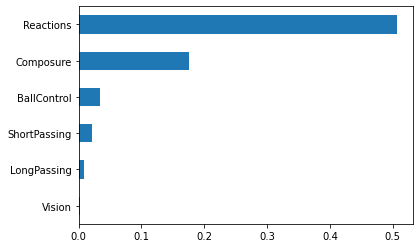

In [24]:
feature_importance = pd.Series(coefficients, index=train[features].columns)
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()

As we can see and already knew from viewing the correlation matrix Reactions and Composure are the most relevant features and best predictiors for Overall Rating. We can see though that the correlations with Overall column for Reactions and Composure were not that different (0.85 and 0.72) while we can see that the gap in terms of relevance from our plot above is showing way bigger, it's kinda 3 times more relevant than the composure.

# IN SIMPLE WORDS

In [25]:
test.loc[:, 'Predicted Overall'] = test_predictions
test.loc[:, 'Differences in Percentages'] = ((test['Predicted Overall'] - test['Overall']) / test['Overall'] * 100)
test.loc[:, 'Differences in Percentages'] = test.loc[:, 'Differences in Percentages'].abs().copy()

print(test['Differences in Percentages'].describe())

count    6159.000000
mean        4.086505
std         3.398058
min         0.001673
25%         1.488645
50%         3.286999
75%         5.710365
max        29.449071
Name: Differences in Percentages, dtype: float64


C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


This means that the average for the difference in perecentages is 4%.

In [26]:
test[['Overall', 'Predicted Overall', 'Differences in Percentages']].sort_values('Overall', ascending=False).head(10)

,Overall,Predicted Overall,Differences in Percentages
15924,94,89.321856,4.976749
15178,94,89.160226,5.148695
14978,92,88.153833,4.180616
18155,91,82.500180,9.340462
16959,91,85.771857,5.745212
13044,91,85.577484,5.958808
13989,90,86.232141,4.186510
15998,89,86.102038,3.256138
17536,89,82.476721,7.329527
16328,89,79.765874,10.375422


# NOW LET'S TRY DECISION TREE AND SEE THE ACCURACY

Now we're ready to apply the decision tree algorithm. We'll be able to compare its error with the error from linear regression, which will enable us to pick the right algorithm for this data set.

Decision trees tend to predict outcomes much more reliably than linear regression models. Because a decision tree is a fairly complex model, it also tends to overfit, particularly when we don't tweak parameters like maximum depth and minimum number of samples per leaf. Decision trees are also prone to instability -- small changes in the input data can result in a very different output model.

In [27]:
train.head()

,Overall,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Position Category_Attacker,Position Category_Defender,Position Category_Goalkeeper,Position Category_Midfielder
0,60,27.0,59.0,53.0,24.0,46.0,35.0,32.0,42.0,52.0,62.0,63.0,59.0,57.0,53.0,41.0,69.0,72.0,64.0,26.0,55.0,59.0,43.0,37.0,36.0,56.0,58.0,60.0,58.0,10.0,12.0,11.0,10.0,8.0,1,0,0,0
1,67,45.0,49.0,70.0,40.0,71.0,62.0,43.0,65.0,68.0,78.0,77.0,79.0,64.0,83.0,53.0,75.0,69.0,64.0,53.0,79.0,57.0,59.0,67.0,40.0,57.0,68.0,62.0,62.0,8.0,12.0,8.0,5.0,7.0,0,0,0,1
2,70,35.0,68.0,63.0,51.0,49.0,41.0,48.0,50.0,59.0,64.0,64.0,63.0,63.0,56.0,55.0,81.0,61.0,75.0,34.0,69.0,69.0,38.0,55.0,53.0,68.0,68.0,72.0,71.0,13.0,15.0,10.0,16.0,16.0,1,0,0,0
3,71,73.0,67.0,58.0,56.0,73.0,36.0,33.0,40.0,71.0,93.0,92.0,88.0,64.0,85.0,63.0,70.0,76.0,65.0,53.0,52.0,28.0,74.0,62.0,66.0,67.0,50.0,28.0,22.0,15.0,10.0,13.0,12.0,12.0,0,0,1,0
4,57,63.0,49.0,54.0,54.0,63.0,49.0,48.0,44.0,61.0,65.0,68.0,50.0,39.0,90.0,73.0,42.0,61.0,33.0,49.0,31.0,20.0,52.0,52.0,67.0,49.0,41.0,28.0,27.0,5.0,10.0,11.0,7.0,6.0,0,0,0,1


In [28]:
# Decision Tree with min_samples_leaf = 5 and 2 most relevant features

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

features = ['Composure', 'Reactions']
target = 'Overall'

reg = DecisionTreeRegressor(min_samples_leaf=5) # try with 5
reg.fit(train[features], train['Overall'])

# Getting the predictions
train_predictions = reg.predict(train[features])
test_predictions = reg.predict(test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

3.0505128035594886
3.403809461509701


In [29]:
# Decision Tree with min_samples_leaf = 15 and 3 most relevant features

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

features = ['Composure', 'Reactions', 'BallControl']
target = 'Overall'

reg = DecisionTreeRegressor(min_samples_leaf=15) # try with 15
reg.fit(train[features], train['Overall'])

# Getting the predictions
train_predictions = reg.predict(train[features])
test_predictions = reg.predict(test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

2.7150779894112134
3.0469192094889217


We can see that the accuracy got much better in both cases. Both changes (adding new features and increasing the min samples leaf) contributed to this better accuracy.

# APPLYING RANDOM FORESTS

We can now apply the random forest algorithm, which improves on the decision tree algorithm.

Random forests tend to be much more accurate than simple models like linear regression.

Due to the way random forests are constructed, they tend to overfit much less than decision trees.

Random forests can still be prone to overfitting, though, so it's important to tune parameters like maximum depth and minimum samples per leaf.

In [30]:
# Random Forest with min_samples_leaf = 5 and 2 most relevant features

from sklearn.ensemble import RandomForestRegressor

features = ['Composure', 'Reactions']
target = 'Overall'

reg = RandomForestRegressor(min_samples_leaf=5) # try with 5
reg.fit(train[features], train['Overall'])

# Getting the predictions
train_predictions = reg.predict(train[features])
test_predictions = reg.predict(test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

3.0602971233739424
3.341190181050871


In [31]:
# Random Forest with min_samples_leaf = 5 and 6 most relevant features

from sklearn.ensemble import RandomForestRegressor

features = ['Composure', 'Reactions', 'ShortPassing', 'Vision', 'LongPassing', 'BallControl']
target = 'Overall'

reg = RandomForestRegressor(min_samples_leaf=5) # try with 5
reg.fit(train[features], train['Overall'])

# Getting the predictions
train_predictions = reg.predict(train[features])
test_predictions = reg.predict(test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

1.9746461714804229
2.770052083058977


In [32]:
# Random Forest with min_samples_leaf = 10 and 6 most relevant features + 4 dummy columns

from sklearn.ensemble import RandomForestRegressor

features = ['Composure', 'Reactions', 'ShortPassing', 'Vision', 'LongPassing', 'BallControl', 'Position Category_Defender', 'Position Category_Goalkeeper', 'Position Category_Midfielder', 'Position Category_Attacker']
target = 'Overall'

reg = RandomForestRegressor(min_samples_leaf=10) # try with 10
reg.fit(train[features], train['Overall'])

# Getting the predictions
train_predictions = reg.predict(train[features])
test_predictions = reg.predict(test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

2.294758498766908
2.769507045016536


We can see that eventually the Random Forest with 6 features and 5 min samples leaf is the best model - that is the model with the lowest accuracy error on the test set which is 2.74. 

We can also notice that increasing the number of min samples leaf in this case does not improve the accuracy, so we can leave it at 5. Also adding the dummy columns of position category were not helpful either.

Our linear regression with 2 features yielded rmse of 3.358 and the linear regression with 6 features yielded 3.50. 

So even though the correlations between our target column and train columns were quite good, but just because LR model is sensitive to outliers the overall error was high. And there are definitely outliers in Overall column such as Messi Ronaldo and maybe other 50 players that have a rating of 80 plus.

# CONCLUSION

Okay. What we already did above is just play with playerschars dataset and used Linear Regression and Random Forests Machine Learning Model to predict the Overall column values. It turned out that Composure and Reactions features where the most relevant and decisive predictors for the Overall column. The other less but still relatively relevant features were Short and Long Passing, Vision and Ball Control.

Which does make sense. 

Composure (internal self control) + Reactions (feedback to external) are the 2 key attributes that are decisive. 

Add Ball Control + Vission + Passing and you will have a great baller!

In [33]:
df2[['Name', 'Overall', 'Reactions', 'Composure', 'ShortPassing', 'Vision', 'LongPassing', 'BallControl']].sort_values('Overall', ascending=False).head(3)

,Name,Overall,Reactions,Composure,ShortPassing,Vision,LongPassing,BallControl
0,L. Messi,94,95.0,96.0,90.0,94.0,87.0,96.0
1,Cristiano Ronaldo,94,96.0,95.0,81.0,82.0,77.0,94.0
2,Neymar Jr,92,94.0,94.0,84.0,87.0,78.0,95.0


In [34]:
df2[['Name', 'Overall', 'Reactions', 'Composure', 'ShortPassing', 'Vision', 'LongPassing', 'BallControl']].sort_values('Reactions', ascending=False).head(3)

,Name,Overall,Reactions,Composure,ShortPassing,Vision,LongPassing,BallControl
1,Cristiano Ronaldo,94,96.0,95.0,81.0,82.0,77.0,94.0
0,L. Messi,94,95.0,96.0,90.0,94.0,87.0,96.0
2,Neymar Jr,92,94.0,94.0,84.0,87.0,78.0,95.0


In [35]:
df2[['Name', 'Overall', 'Reactions', 'Composure', 'ShortPassing', 'Vision', 'LongPassing', 'BallControl']].sort_values('Composure', ascending=False).head(3)

,Name,Overall,Reactions,Composure,ShortPassing,Vision,LongPassing,BallControl
0,L. Messi,94,95.0,96.0,90.0,94.0,87.0,96.0
1,Cristiano Ronaldo,94,96.0,95.0,81.0,82.0,77.0,94.0
2,Neymar Jr,92,94.0,94.0,84.0,87.0,78.0,95.0


We can see that the best 3 players in FIFA which was the case in the real world as well have also the highest Reactions and Composure.